Gradiometry Simulation: Block in Halfspace
====================================

## Geoscientific Problem

For this code comparison, we simulated gravity gradiometry data for a density contrast model over a dense block within a homogeneous background. The background density contrast was 0 $g/cm^3$ and the density contrast of the block 0.1 $g/cm^3$. The dimensions of the block in the x, y and z directions were are all 200 m. The block was buried at a depth of 200 m.

Gradiometry data were simulated 1 m above the surface. The survey region was 1000 m by 1000 m, the center of which lied directly over the center of the block. The station spacing was 50 m in both the X and Y directions.

*A figure illustrating the density contrast model and survey geometry is shown further down*

## Codes/Formulations Being Compared

**SimPEG 3D Integral Formulation:** This approach to solving the forward problem uses the *SimPEG.potential_fields.gravity.simulation.Simulation3DIntegral* simulation class.

**UBC-GIF GG3D v6.0.1:** [GG3D v6.0.1](https://gg3d.readthedocs.io/en/latest/) is a voxel cell gravity gradiometry forward modeling and inversion package developed by the UBC Geophysical Inversion Facility. This software is proprietary and can ONLY be acquired through appropriate [academic](https://gif.eos.ubc.ca/software/licenses_academic) or [commerical](https://gif.eos.ubc.ca/software/licenses_commercial) licenses. The numerical approach of the forward simulation is described in the [online manual's theory section](https://gg3d.readthedocs.io/en/latest/content/theory.html). If you have a valid license, there are instructions for reproducing the results (**add link**). 

## Loading Assets Into the SimPEG Framework

We start by importing any necessary packages for running the notebook.

In [1]:
from SimPEG.utils import plot2Ddata
from SimPEG.utils.io_utils import read_gg3d_ubc
from discretize import TensorMesh
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams.update({"font.size": 14})

Next we download the mesh, model and simulated data for each code.

In [2]:
# For each package, download .tar files

The mesh, model and predicted data for each code are then loaded into the SimPEG framework for plotting.

In [3]:
rootdir = './../../../assets/gravity/block_halfspace_gradiometry_fwd_simpeg/'
mesh_simpeg = TensorMesh.read_UBC(rootdir+'mesh.txt')
model_simpeg = TensorMesh.read_model_UBC(mesh_simpeg, rootdir+'model.den')
data_simpeg = read_gg3d_ubc(rootdir+'dpred_simpeg.gg')

rootdir = './../../../assets/gravity/block_halfspace_gradiometry_fwd_gg3d/'
mesh_ubc = TensorMesh.read_UBC(rootdir+'mesh.txt')
model_ubc = TensorMesh.read_model_UBC(mesh_simpeg, rootdir+'model.den')
data_ubc = read_gg3d_ubc(rootdir+'ggfor3d.gg')

## Geophysical Scenario

Below, we plot the density contrast model and survey geometry used in the forward simulation.

Text(0, 0.5, 'y (m)')

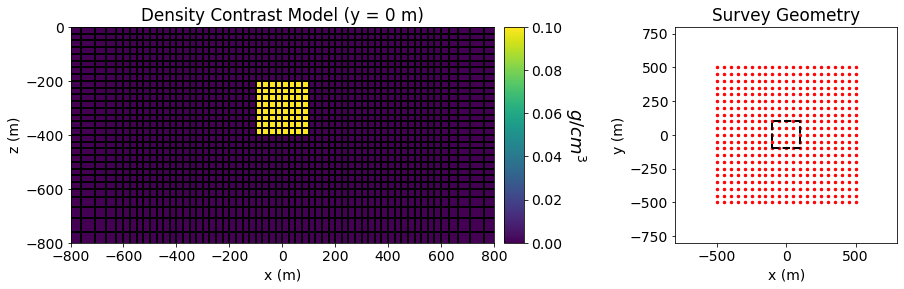

In [4]:
fig = plt.figure(figsize=(14, 4))

ax11 = fig.add_axes([0.1, 0.15, 0.42, 0.75])
ind = int(mesh_simpeg.shape_cells[1]/2)
mesh_simpeg.plot_slice(
    model_simpeg, normal='Y', ind=ind, grid=True, ax=ax11, pcolor_opts={"cmap": "viridis"}
)

ax11.set_xlim([-800, 800])
ax11.set_ylim([-800, 0])
ax11.set_title("Density Contrast Model (y = 0 m)")
ax11.set_xlabel("x (m)")
ax11.set_ylabel("z (m)")

ax12 = fig.add_axes([0.53, 0.15, 0.02, 0.75])
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(model_simpeg))
cbar = mpl.colorbar.ColorbarBase(
    ax12, norm=norm, cmap=mpl.cm.viridis, orientation="vertical"
)
cbar.set_label("$g/cm^3$", rotation=270, labelpad=25, size=18)

xyz = data_simpeg.survey.receiver_locations
ax21 = fig.add_axes([0.7, 0.15, 0.22, 0.75])
ax21.scatter(xyz[:, 0], xyz[:, 1], 6, 'r')
ax21.plot(100*np.r_[-1, 1, 1, -1, -1], 100*np.r_[-1, -1, 1, 1, -1], 'k--', lw=2.)
ax21.set_xlim([-800, 800])
ax21.set_ylim([-800, 800])
ax21.set_title("Survey Geometry")
ax21.set_xlabel("x (m)")
ax21.set_ylabel("y (m)")

## Simulated Data Plots

Here we plot the simulated data for all codes/formulations.

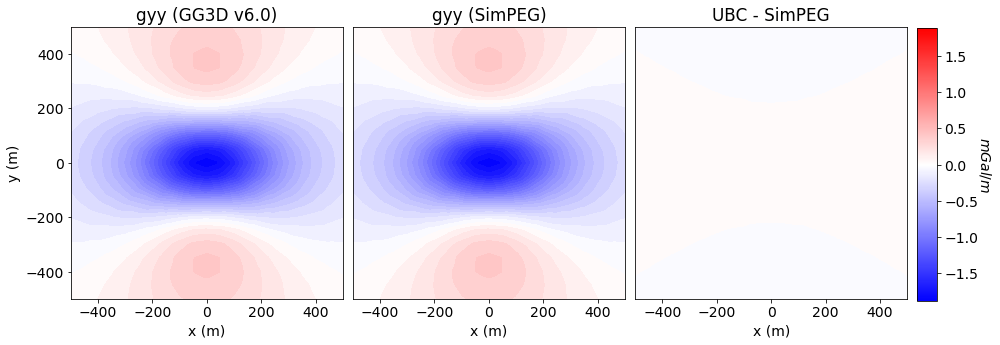

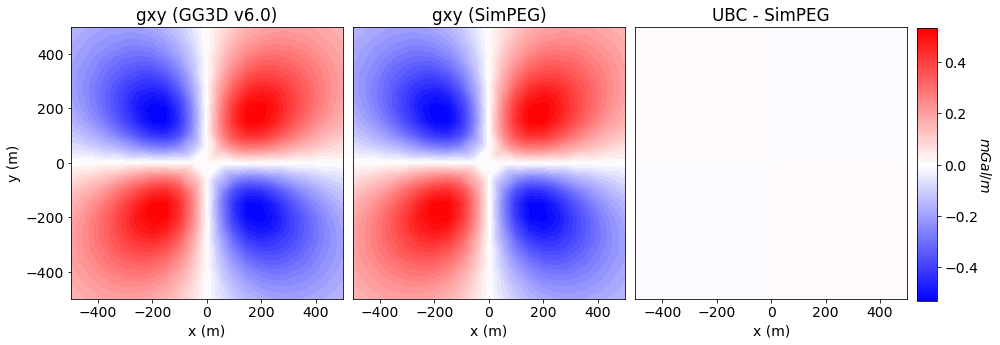

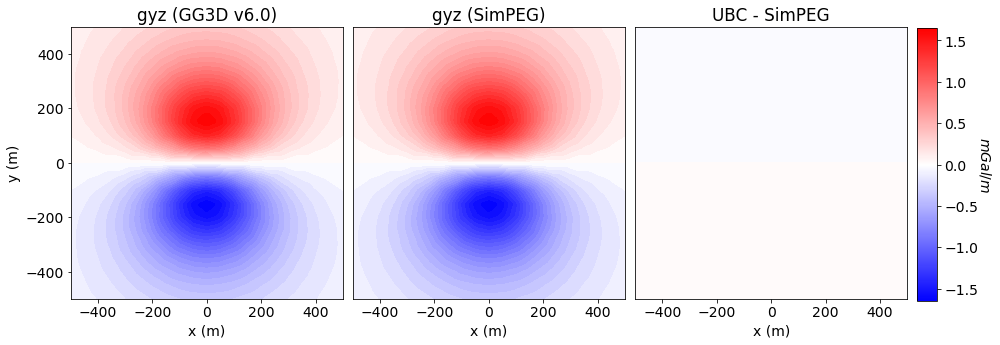

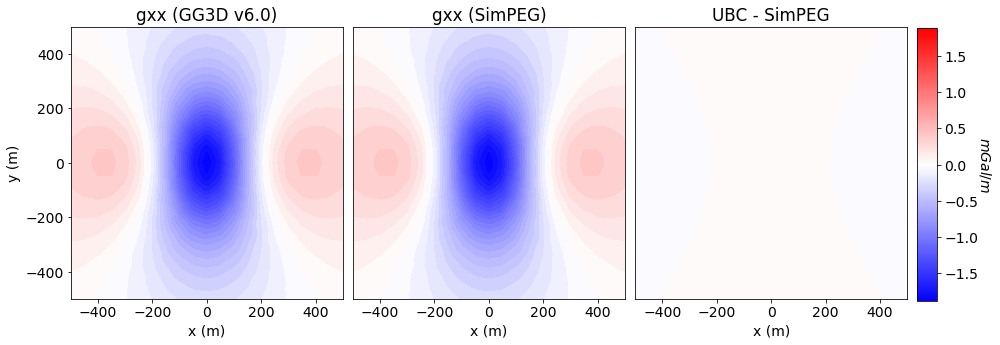

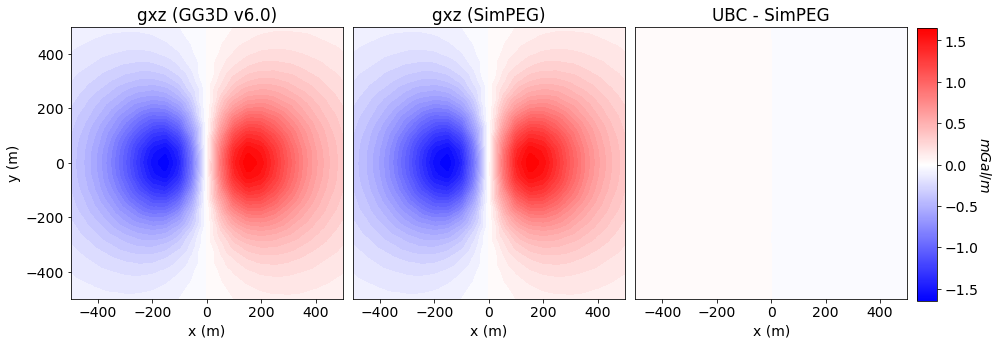

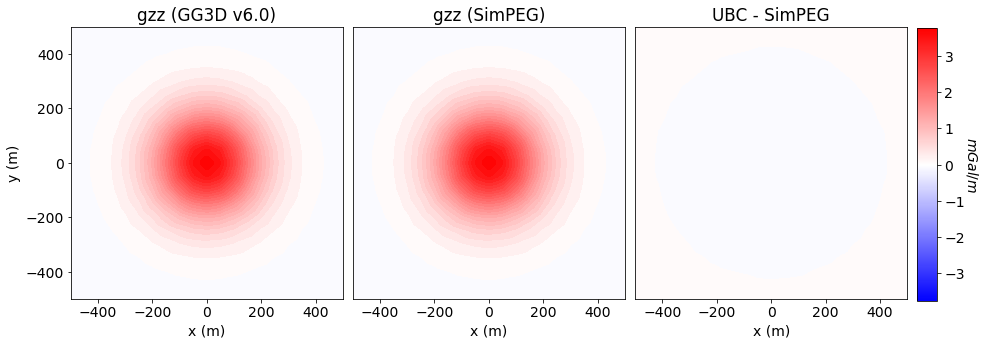

In [5]:
comp_str = list(data_simpeg.survey.components.keys())
xyz = data_simpeg.survey.receiver_locations
dpred_simpeg = np.reshape(data_simpeg.dobs, (data_simpeg.survey.nRx, len(comp_str)))
dpred_ubc = np.reshape(data_ubc.dobs, (data_ubc.survey.nRx, len(comp_str)))

for ii in range(0, len(comp_str)):
    
    max_val = np.max(np.abs(np.r_[
        dpred_ubc[:, ii], dpred_simpeg[:, ii], dpred_ubc[:, ii]-dpred_simpeg[:, ii]
    ]))

    fig = plt.figure(figsize=(14, 5))

    ax1 = fig.add_axes([0.05, 0.1, 0.27, 0.85])
    plot2Ddata(
        xyz, dpred_ubc[:, ii], ax=ax1, clim=(-max_val, max_val),
        ncontour=50, contourOpts={"cmap": "bwr"}
    )
    ax1.set_title(comp_str[ii] + " (GG3D v6.0)")
    ax1.set_xlabel("x (m)")
    ax1.set_ylabel("y (m)")

    ax2 = fig.add_axes([0.33, 0.1, 0.27, 0.85])
    plot2Ddata(
        xyz, dpred_simpeg[:, ii], ax=ax2, clim=(-max_val, max_val),
        ncontour=50, contourOpts={"cmap": "bwr"}
    )
    ax2.set_title(comp_str[ii] + " (SimPEG)")
    ax2.set_xlabel("x (m)")
    ax2.set_yticks([])

    ax3 = fig.add_axes([0.61, 0.1, 0.27, 0.85])
    plot2Ddata(
        xyz, dpred_ubc[:, ii]-dpred_simpeg[:, ii], ax=ax3,
        clim=(-max_val, max_val), ncontour=50, contourOpts={"cmap": "bwr"}
    )
    ax3.set_title("UBC - SimPEG")
    ax3.set_xlabel("x (m)")
    ax3.set_yticks([])

    ax4 = fig.add_axes([0.89, 0.14, 0.02, 0.76])
    norm = mpl.colors.Normalize(vmin=-max_val, vmax=max_val)
    cbar = mpl.colorbar.ColorbarBase(
        ax4, norm=norm, orientation="vertical", cmap=mpl.cm.bwr
    )
    cbar.set_label("$mGal/m$", rotation=270, labelpad=15, size=14)

    plt.show()